**Company**: Albertsons

**Project** **Title**: Inventory Optimizaion

**Team** **Members**:

Safaa Almudhffer

Garima Astha

Venkat Subramaniam Balaji

Rae Wright

Xuzhou Feng

🛠️ # **Objective**

This notebook focuses on inventory optimization. The code calculates the recommended inventory level to be maintained and the reorder point. The goal is to know weekly inventory that has to be available to meet the demand.

# **The Data used for the Overall analysis**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data_merge = pd.read_csv('/content/drive/MyDrive/Albertsons/merged_left_v3.csv')

data_mergea

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,corp_item_cd,genrt_cic_id,desc_dem,brand_cd,category_id,week_dem,year_dem,whse_cd,valid_demand_qty,whse_quantity_shipped,...,group_cd,ctgry_cd,pack_whse,size,desc_inv,vendor_num,status_dst,on_hand,year_inv,week_inv
0,88800922,328996,TRAY FOAM BLACK 10P MEAT MB,0.0,8880.0,10,2024,6008,242,242,...,88.0,80.0,1.0,300 CT,TRAY FOAM BLACK 10P MEAT MB,30267.0,V,269.0,2024.0,10.0
1,8100662,260265,ARIZONA GREEN TEA,1381.0,310.0,44,2023,6008,867,867,...,3.0,10.0,4.0,128 FZ,ARIZONA GREEN TEA,17702.0,V,1546.0,2023.0,44.0
2,14152724,16762,KINDERS BUTTER STEAKHOUSE RUB,0.0,1450.0,6,2025,6008,61,61,...,14.0,50.0,6.0,5.5 OZ,KINDERS BUTTER STEAKHOUSE RUB,22967.0,V,249.0,2025.0,6.0
3,82350283,274376,SNCK FCTRY PRTZL CRSP EVERYTHING VALUE,0.0,8235.0,2,2025,6008,36,36,...,82.0,35.0,12.0,14 OZ,SNCK FCTRY PRTZL CRSP EVERYTHING VALUE,1463.0,V,285.0,2025.0,2.0
4,2040219,28671,O ORGNC RICE CAKES UNSALTED,301.0,215.0,18,2023,6008,28,28,...,2.0,15.0,12.0,4.9 OZ,O ORGNC RICE CAKES UNSALTED,14483.0,V,180.0,2023.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918570,9100329,359259,DAVID SNFLWR SDS,0.0,910.0,31,2023,6008,65,65,...,9.0,10.0,12.0,5.25 OZ,DAVID SNFLWR SDS,691.0,V,321.0,2023.0,31.0
918571,20020068,24324,OCN SPRY SPRK CRANBERRY,1570.0,2001.0,1,2024,6008,65,65,...,20.0,1.0,6.0,4-11.5 FZ,OCN SPRY SPRK CRANBERRY,942.0,V,146.0,2024.0,1.0
918572,26320157,33928,NEAR EAST RICE PILAF,0.0,1010.0,39,2024,6008,65,65,...,10.0,10.0,12.0,6.09 OZ,NEAR EAST RICE PILAF,1036.0,V,351.0,2024.0,39.0
918573,25100111,3061593,BR CREEK DRY MINESTRONE SOUP MX,0.0,2510.0,2,2024,6008,65,65,...,25.0,10.0,6.0,8.4 OZ,BR CREEK DRY MINESTRONE SOUP MX,5187.0,V,79.0,2024.0,2.0


In [ ]:
data_merge.columns.tolist()


['corp_item_cd',
 'genrt_cic_id',
 'desc_dem',
 'brand_cd',
 'category_id',
 'week_dem',
 'year_dem',
 'whse_cd',
 'valid_demand_qty',
 'whse_quantity_shipped',
 'weight_shipped',
 'pack_retail_qty',
 'year_week',
 'division',
 'dst_cntr',
 'facility',
 'group_cd',
 'ctgry_cd',
 'pack_whse',
 'size',
 'desc_inv',
 'vendor_num',
 'status_dst',
 'on_hand',
 'year_inv',
 'week_inv']

# **The Visualizations of Predicting and Optimizing Results**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data_predict = pd.read_csv('/content/drive/MyDrive/Albertsons/Smarter_Inventory_Recommendations_Smarter_Inventory_Recommendations.csv')

data_predict

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Week1,Average Demand,Corp Item Cd,Predicted Demand,Recommended Inventory Level,Reorder Point,Safety Stock,Std Deviation
0,19,286.007014,3201244,293.764486,317.70,309.94,23.93,14.505048
1,20,286.007014,3201244,293.764486,317.70,309.94,23.93,14.505048
2,21,286.007014,3201244,294.460025,318.39,309.94,23.93,14.505048
3,22,286.007014,3201244,300.914735,324.85,309.94,23.93,14.505048
4,23,286.007014,3201244,300.676456,324.61,309.94,23.93,14.505048
...,...,...,...,...,...,...,...,...
947,48,2104.369845,99010405,2120.576531,2126.61,2110.40,6.03,3.655511
948,49,2104.369845,99010405,2107.906145,2113.94,2110.40,6.03,3.655511
949,50,2104.369845,99010405,2109.429681,2115.46,2110.40,6.03,3.655511
950,51,2104.369845,99010405,2109.429681,2115.46,2110.40,6.03,3.655511


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

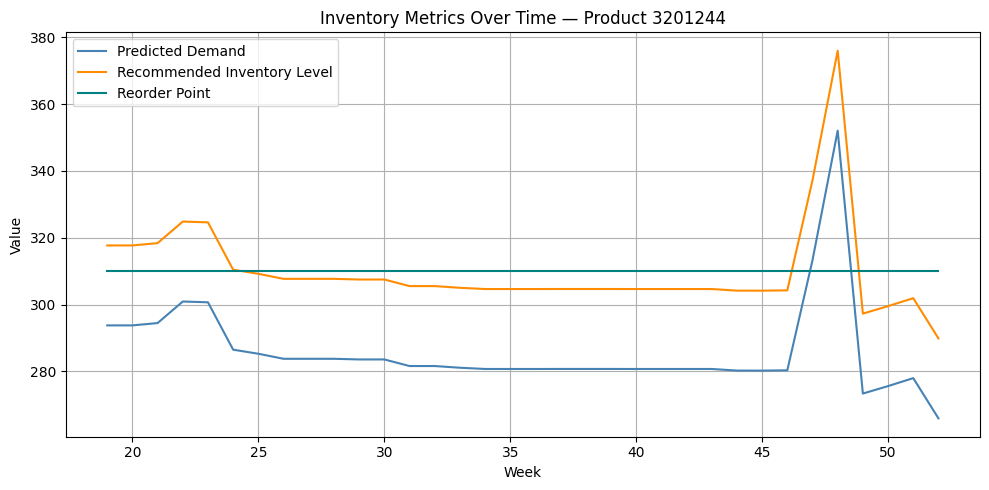

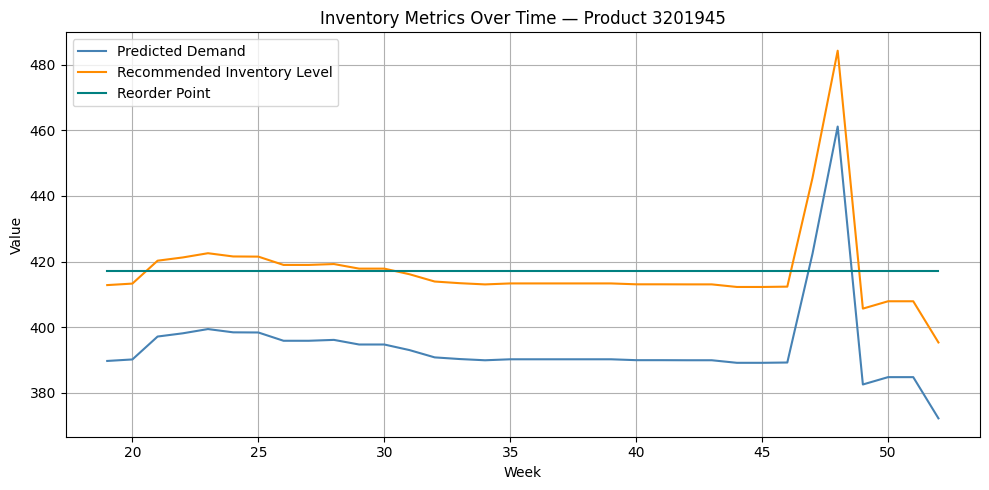

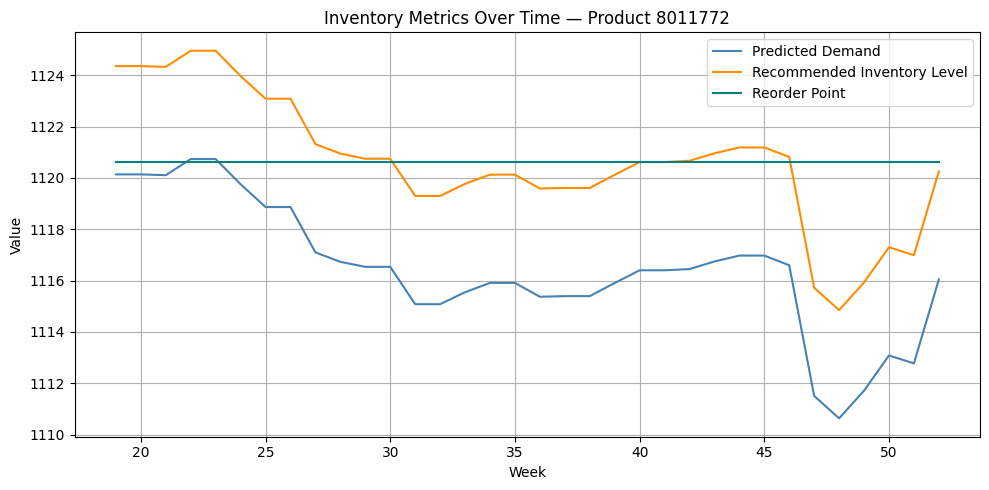

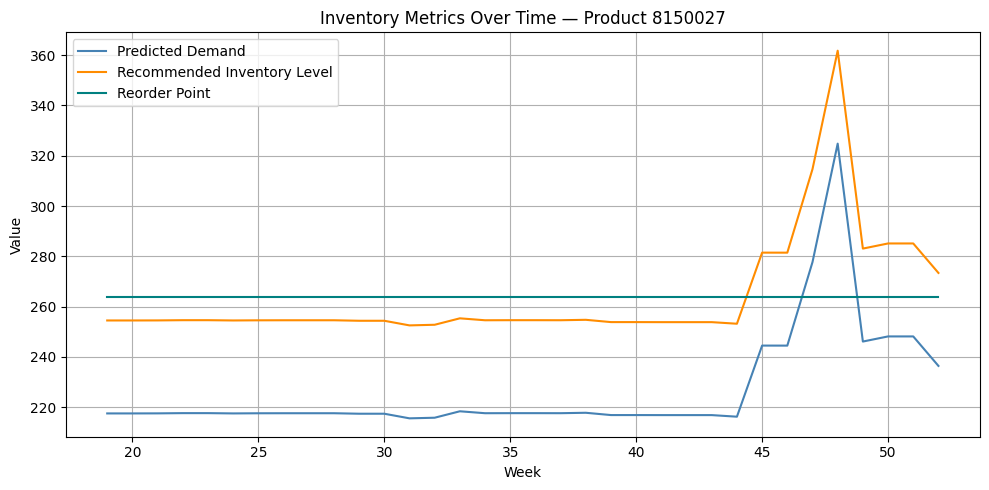

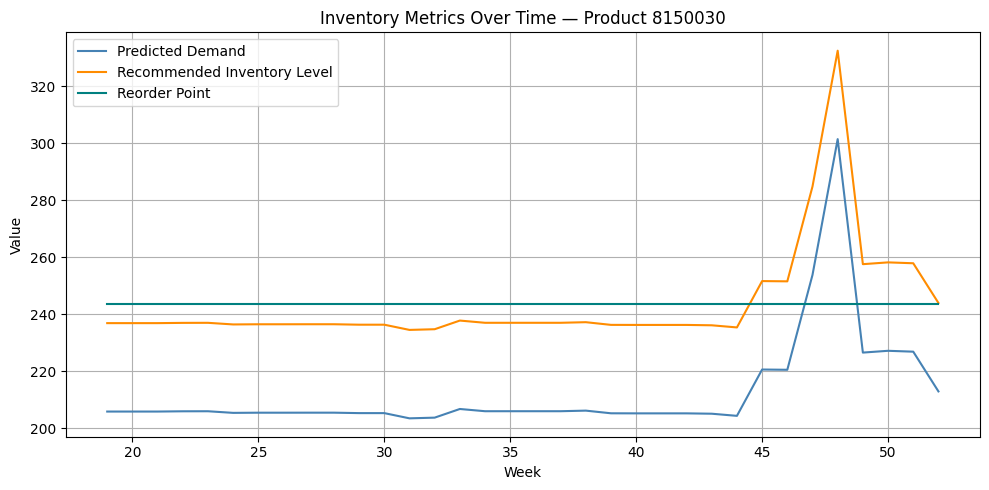

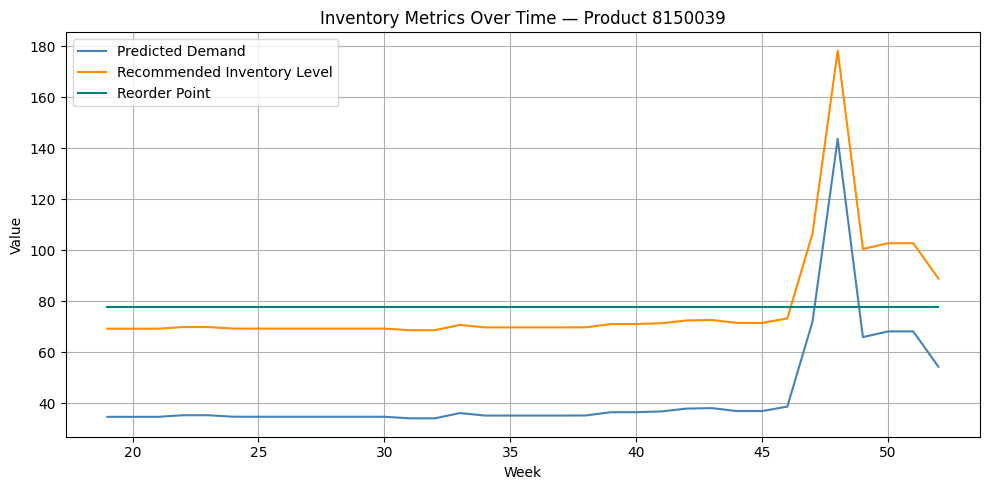

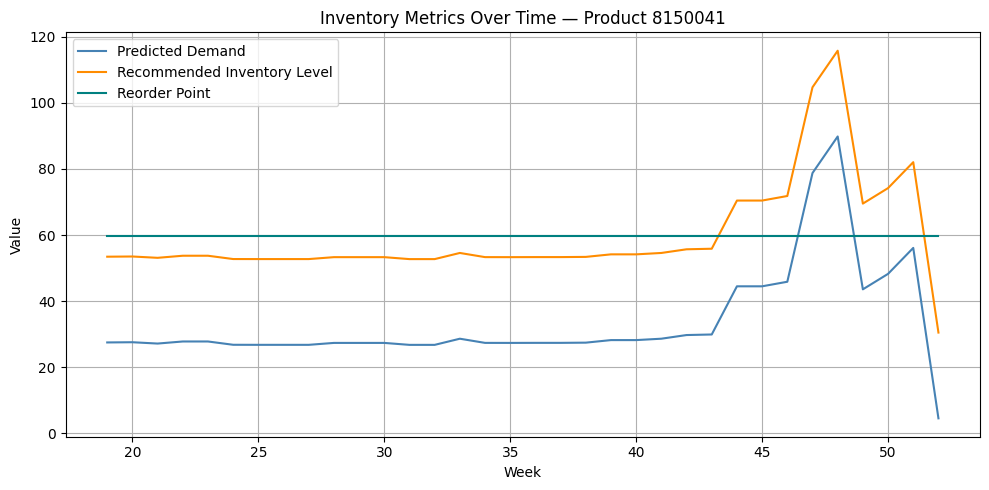

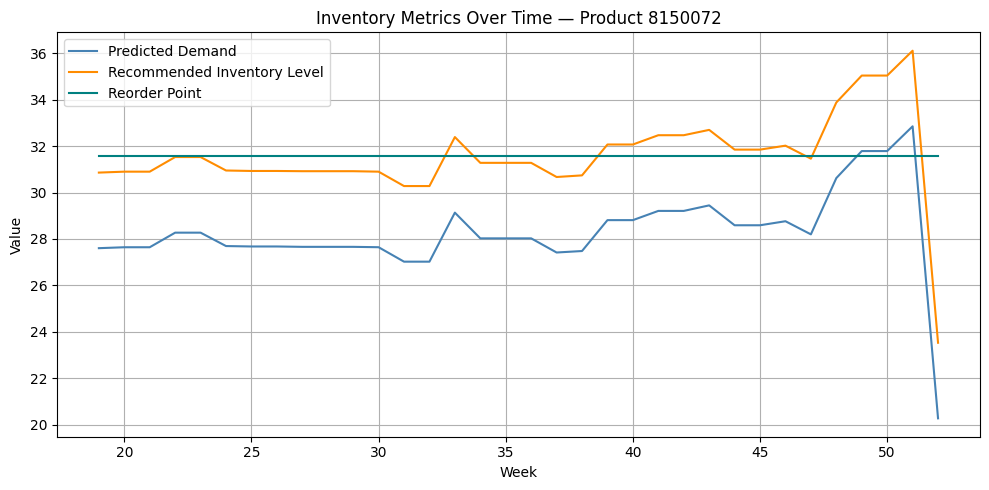

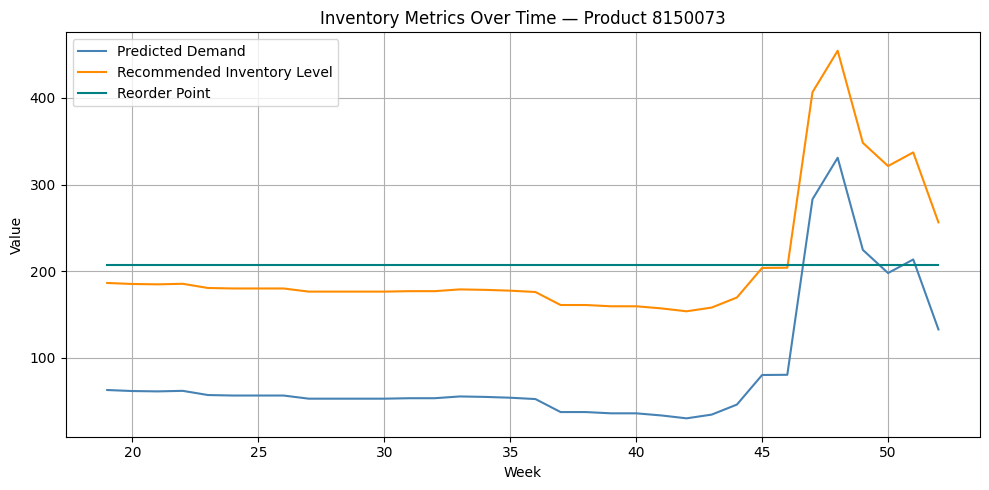

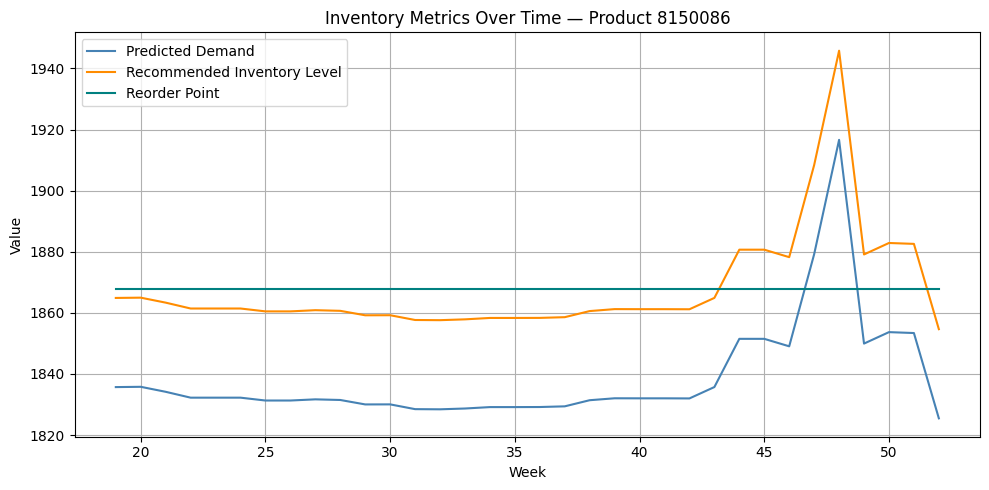

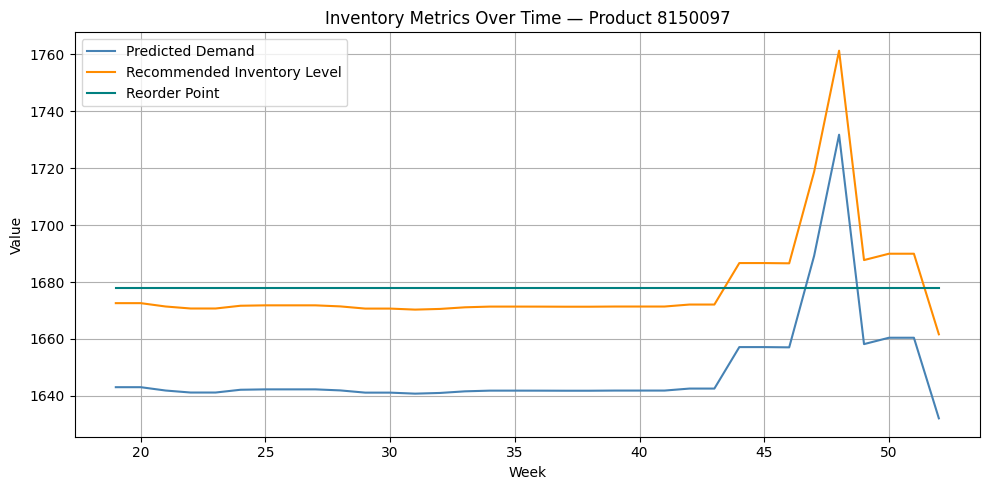

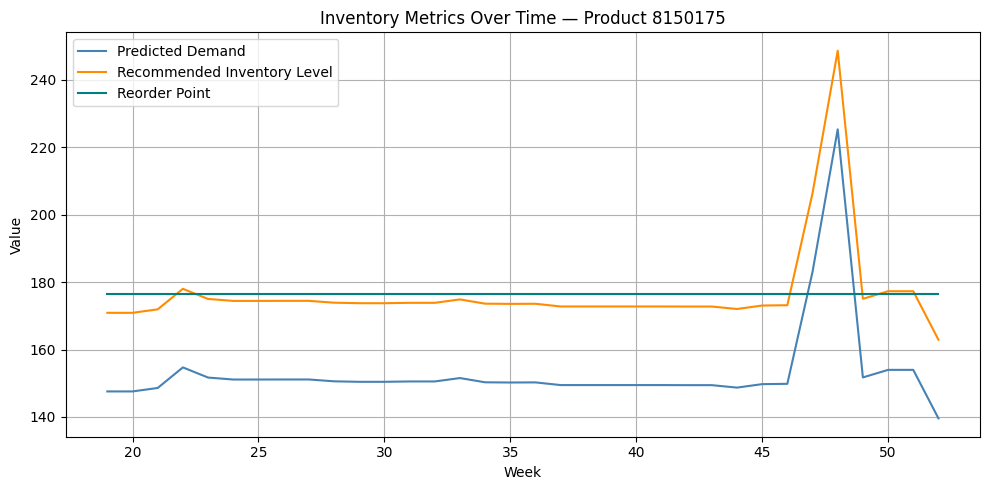

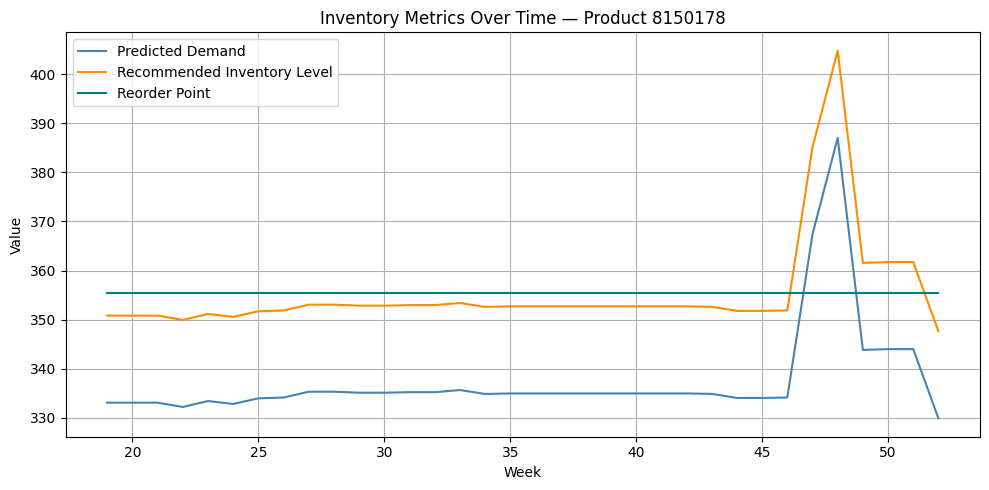

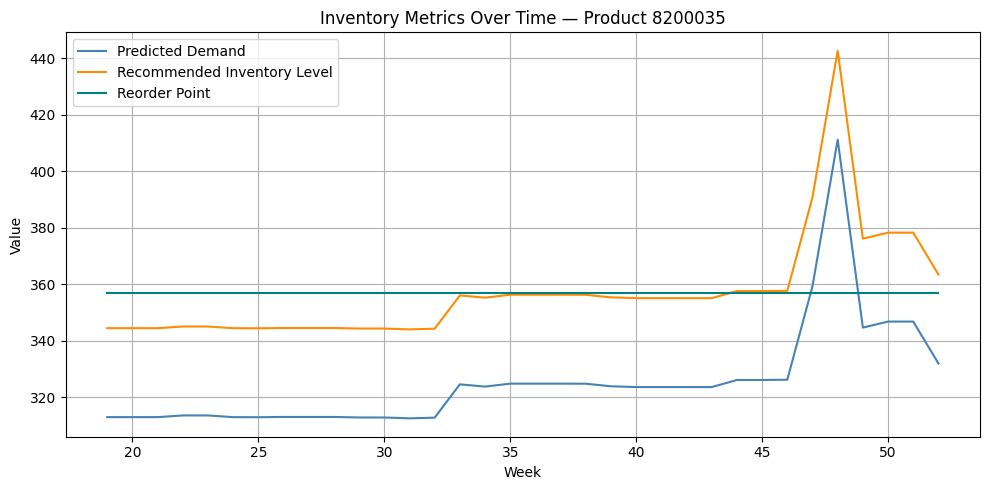

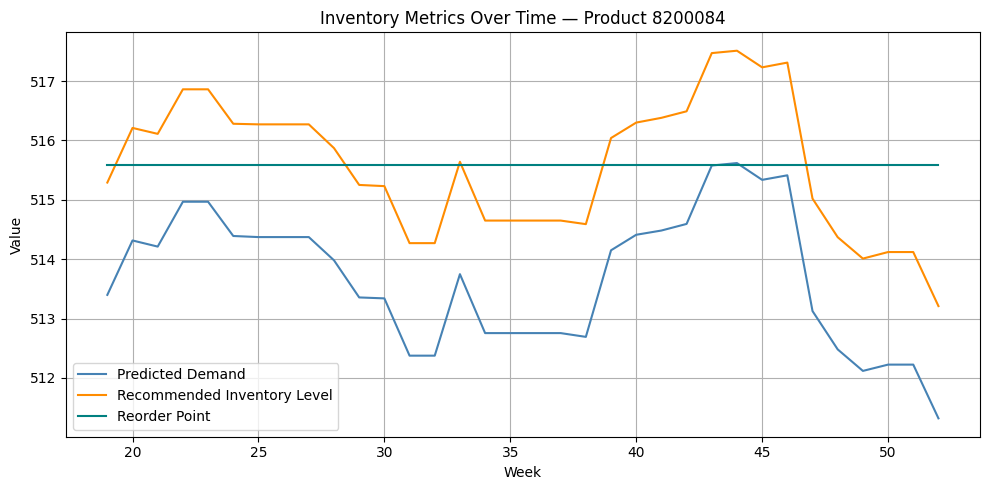

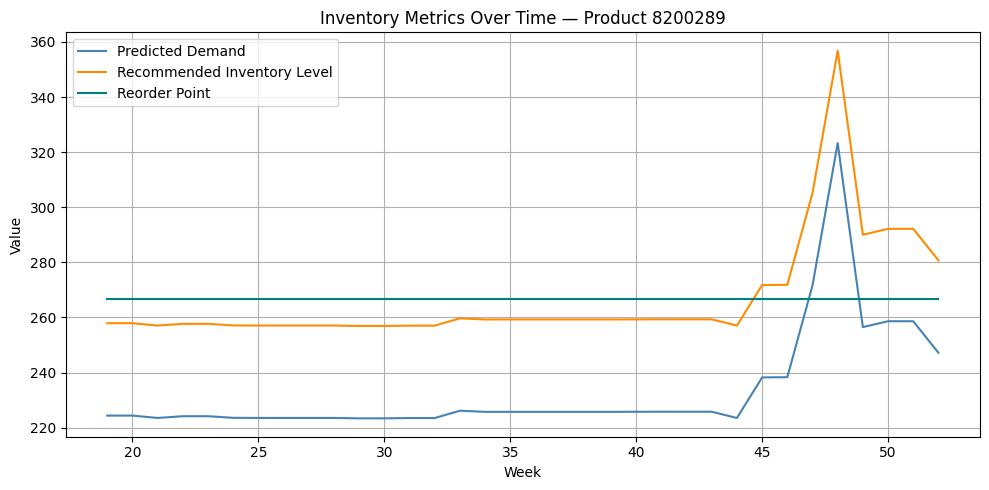

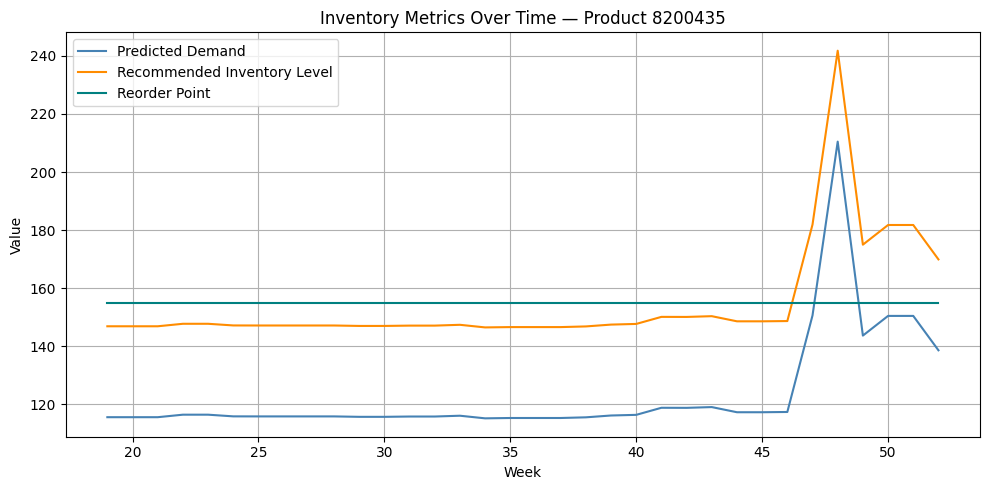

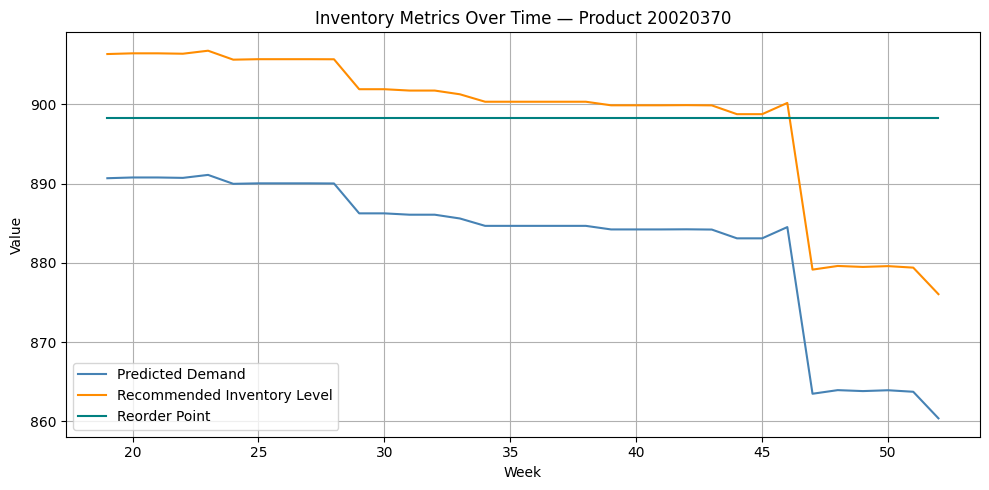

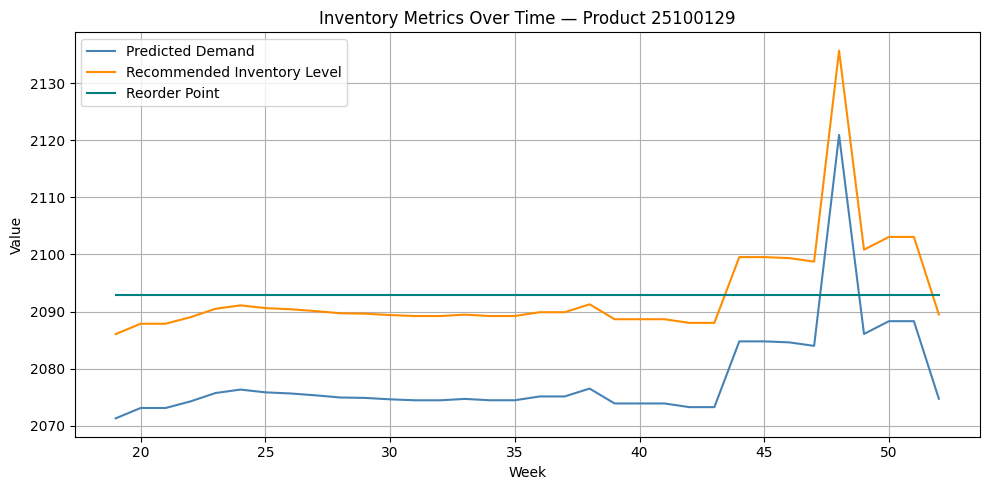

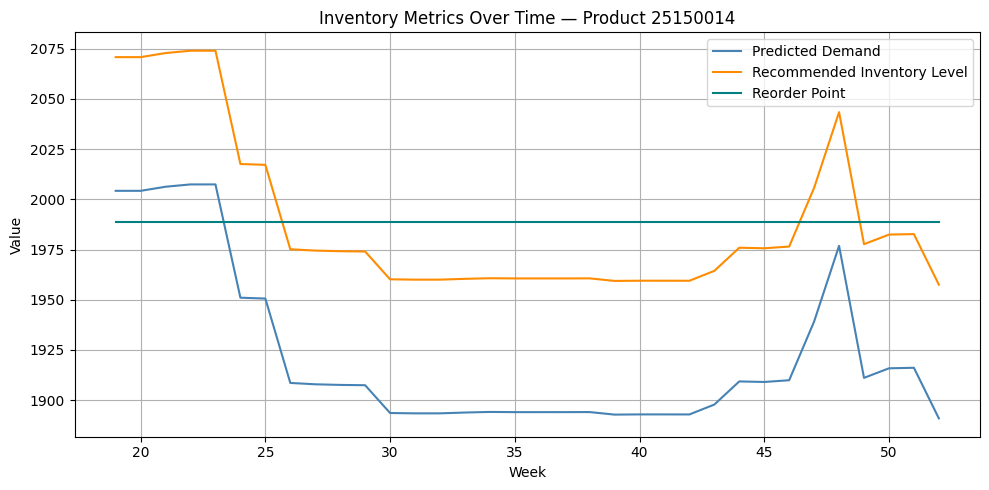

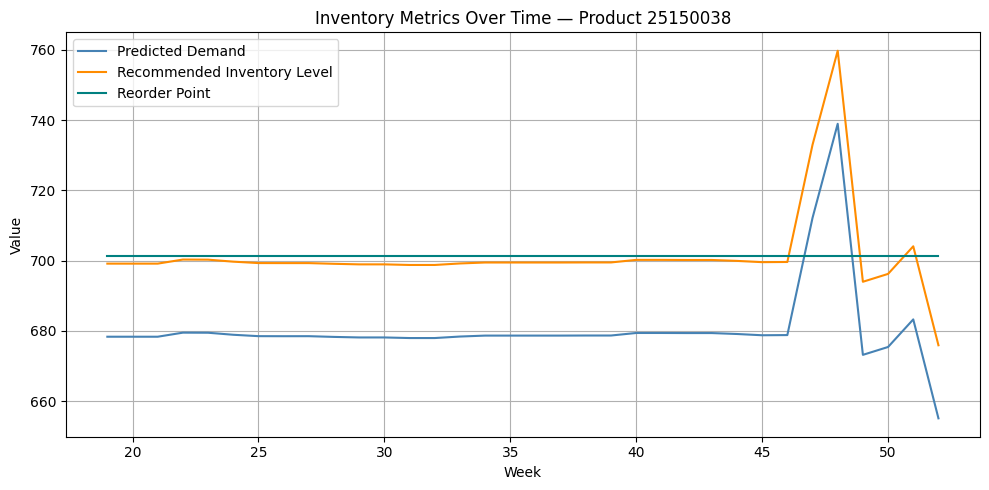

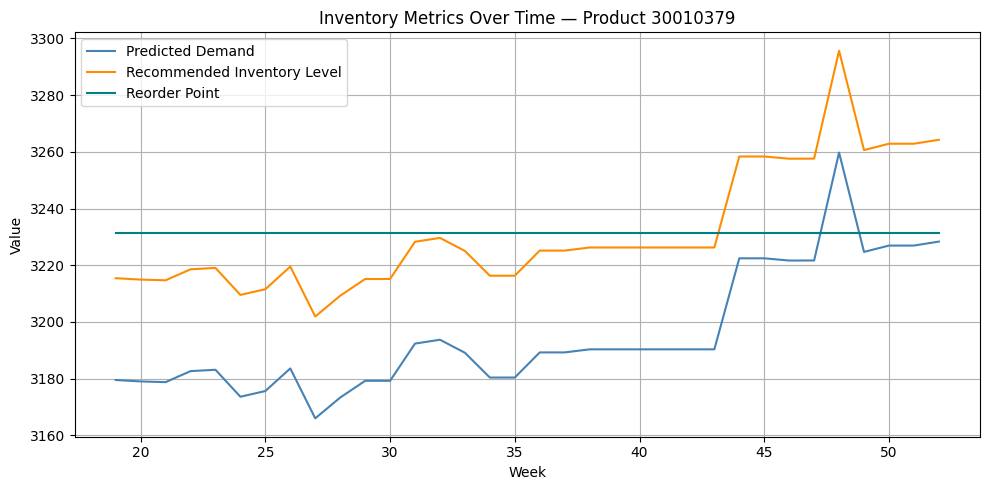

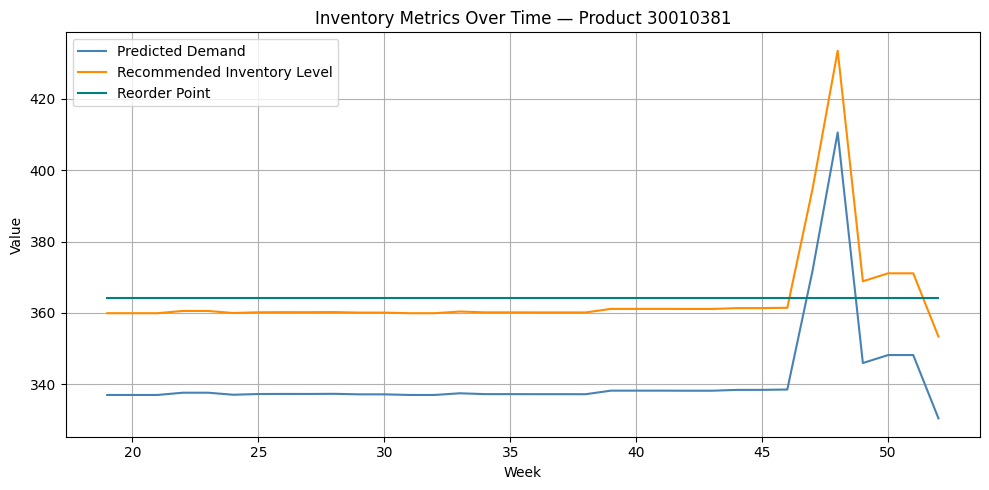

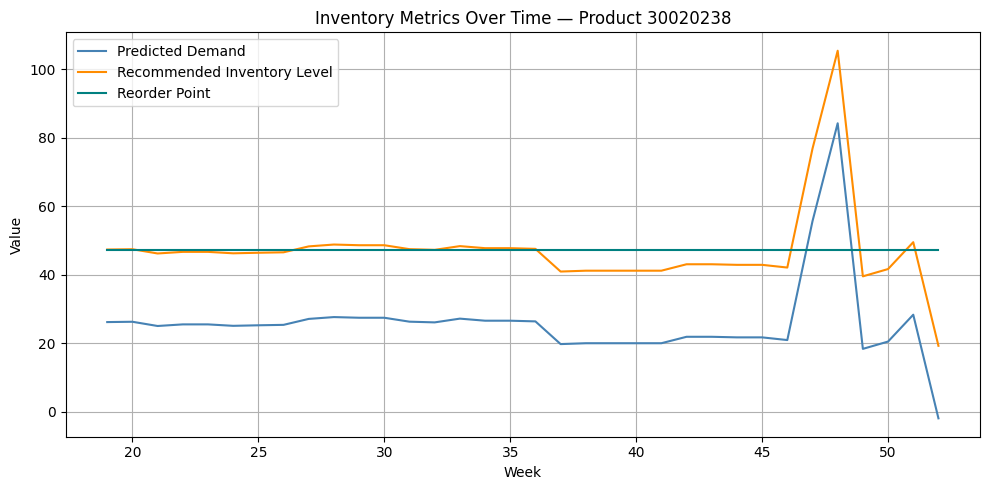

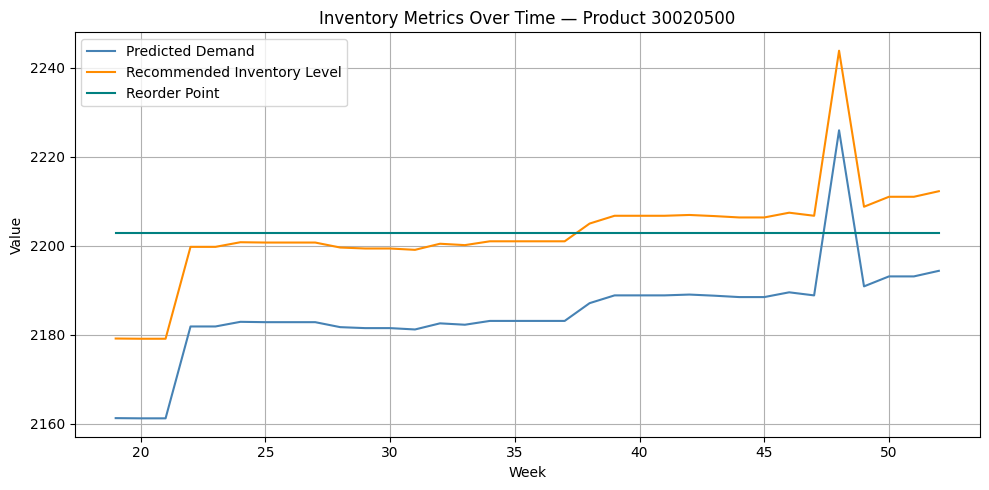

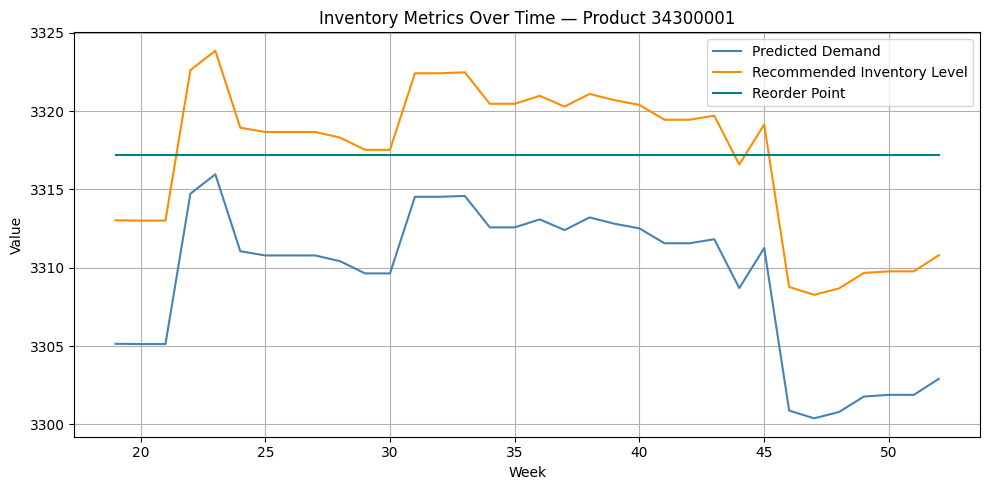

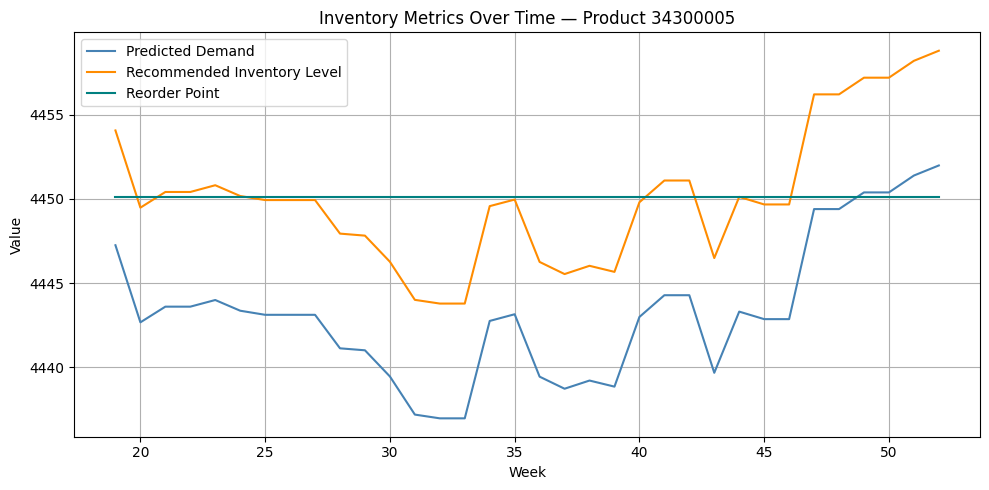

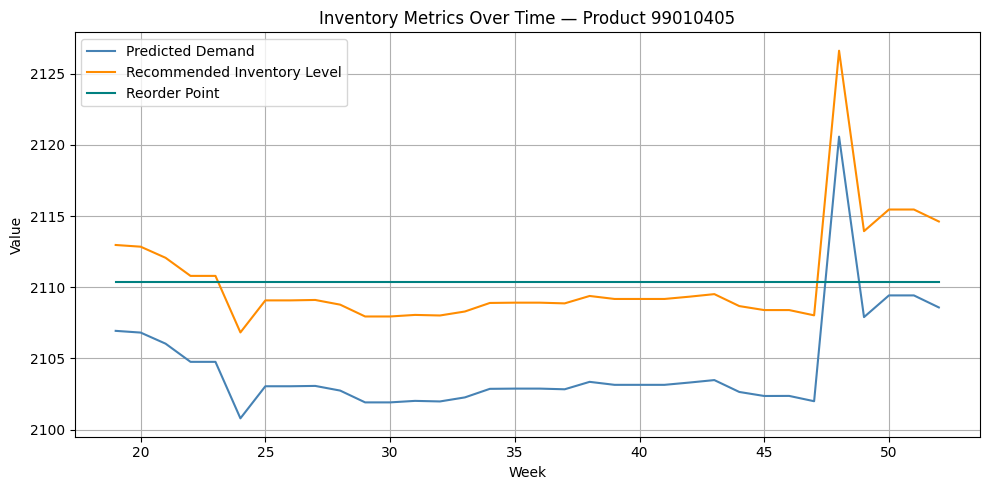

In [ ]:
# Select 3 example products (e.g., 30 unique Corp Item Cd values)
sample_products = data_predict['Corp Item Cd'].unique()[:30]  # pick first 30 unique item codes

# Plot each product
for item_code in sample_products:
    subset = data_predict[data_predict['Corp Item Cd'] == item_code]

    plt.figure(figsize=(10, 5))
    plt.plot(subset['Week1'], subset['Predicted Demand'], label='Predicted Demand', color='steelblue')
    plt.plot(subset['Week1'], subset['Recommended Inventory Level'], label='Recommended Inventory Level', color='darkorange')
    plt.plot(subset['Week1'], subset['Reorder Point'], label='Reorder Point', color='teal')

    plt.title(f'Inventory Metrics Over Time — Product {item_code}')
    plt.xlabel('Week')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# **The names of Optimizing Products**

In [ ]:
# Step 1: Get unique corp_item_cd from data_predict
unique_corp_item_cd = data_predict['Corp Item Cd'].unique()

# Step 2: Filter data_merge for these unique corp_item_cd values
filtered_data_merge = data_merge[data_merge['corp_item_cd'].isin(unique_corp_item_cd)]

# Step 3: Select only corp_item_cd and desc_dem columns, and drop duplicates (optional)
result = filtered_data_merge[['corp_item_cd', 'desc_dem']].drop_duplicates()

# Display the result
print(result)


        corp_item_cd                                  desc_dem
525         30020500  S SEL PAPER TOWEL BRIGHTLY LINT FREE 6RL
633         34300001           MORTON SYSTEM WTR SFTNR PELLETS
2821         8150041                           S SEL CLUB SODA
3050        30020238                       FIORA KITCHEN TOWEL
3341         8150030                           S SEL CLUB SODA
4130        34300005      MORTON SYSTEM WATER SOFTENER PELLETS
6012        99010405            FE-BAG SINC SAFEWAY SINGLE USE
7986         8011772                           S SEL CLUB SODA
10205        8150178                           S SEL CLUB SODA
21068        8150073                           S SEL CLUB SODA
130748       8150175                       S SEL SELTZER WATER
130772       8150086           S SEL SELTZER WATER FRIDGE PACK
130777       8200289                              S PELLEGRINO
130817       8200435                              S PELLEGRINO
130850       8150097                       S SEL SELTZE